<a href="https://colab.research.google.com/github/Prateekbangwal/machine_learning/blob/master/logistic_regression_classification_jovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import opendatasets as od

In [3]:
!pip install opendatasets

In [5]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [7]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prateekbangwal
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 178MB/s]

In [9]:
import os
data_dir = './weather-dataset-rattle-package'

In [10]:
os.listdir(data_dir)

['weatherAUS.csv']

In [11]:
train_csv = data_dir + '/weatherAUS.csv'

In [12]:
import pandas as pd

In [13]:
raw_df = pd.read_csv(train_csv)
raw_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
raw_df.dropna(subset= ['RainToday', 'RainTomorrow'], inplace=True)

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

Exploratory Data Analysis and Visualization


In [22]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
px.histogram(raw_df, x = 'Location', title = 'Location Vs Rainy Days', color = 'RainToday')

In [24]:
px.histogram(raw_df, x = 'Temp3pm', title = 'Temp at 3 pm vs. Rain Tomorrow', color = 'RainTomorrow')

In [25]:
px.histogram(raw_df, x = 'RainTomorrow', title = 'Rain Tomorrow vs. Rain Today', color = 'RainToday')

In [27]:
px.scatter(raw_df.sample(2000), x = 'MinTemp', y = 'MaxTemp',title = 'Min Temp. Vs Max Temp', color = 'RainToday')

In [28]:
px.strip(raw_df.sample(2000), title = 'Temp (3pm) Vs Humidity (3pm)', x = 'Temp3pm', y = 'Humidity3pm', color = 'RainTomorrow')

Split Datasets into Test and Train Data sets


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state = 42)

In [31]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)
print('val_df.shape:', val_df.shape)

train_df.shape: (84471, 23)
test_df.shape: (28158, 23)
val_df.shape: (28158, 23)


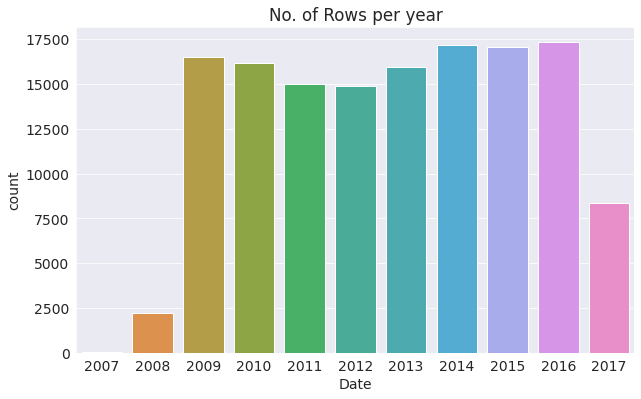

In [34]:
plt.title("No. of Rows per year")
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [36]:
year = pd.to_datetime(raw_df.Date).dt.year

In [38]:
train_df = raw_df[year<2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year>2016]

In [39]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)
print('val_df.shape:', val_df.shape)

train_df.shape: (97988, 23)
test_df.shape: (8369, 23)
val_df.shape: (17089, 23)


In [40]:
train_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
144548  2014-12-27    Uluru     16.9  ...     31.8         No            No
144549  2014-12-28    Uluru     15.1  ...     34.8         No            No
144550  2014-12-29    Uluru     17.3  ...     35.7         No            No
144551  2014-12-30    Uluru     20.1  ...     37.2         No            No
144552  2014-12-31    Uluru     22.5  ...     37.4         No            No

[97988 rows x 23 columns]

In [41]:
test_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2864    2017-01-01   Albury     15.5  ...     31.4         No            No
2865    2017-01-02   Albury     14.9  ...     30.5         No            No
2866    2017-01-03   Albury     13.7  ...     29.5         No            No
2867    2017-01-04   Albury     16.2  ...     31.2         No            No
2868    2017-01-05   Albury     18.0  ...     32.4         No            No
...            ...      ...      ...  ...      ...        ...           ...
145454  2017-06-20    Uluru      3.5  ...     20.9         No            No
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No

[8369 rows x 23 columns]

In [42]:
val_df

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
2133    2015-01-01   Albury     11.4  ...     32.7         No            No
2134    2015-01-02   Albury     15.5  ...     38.2         No            No
2135    2015-01-03   Albury     17.1  ...     37.0         No            No
2136    2015-01-04   Albury     26.0  ...     30.9         No            No
2137    2015-01-05   Albury     19.0  ...     32.5         No            No
...            ...      ...      ...  ...      ...        ...           ...
144913  2015-12-27    Uluru     20.5  ...     33.0         No            No
144914  2015-12-28    Uluru     18.0  ...     35.0         No            No
144915  2015-12-29    Uluru     17.5  ...     34.7         No            No
144916  2015-12-30    Uluru     20.0  ...     38.4         No            No
144917  2015-12-31    Uluru     19.3  ...     35.8         No            No

[17089 rows x 23 columns]

In [43]:
input_cols = list(train_df.columns)[1:-1]

In [44]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [45]:
target_col = 'RainTomorrow'
target_col

'RainTomorrow'

In [46]:
train_inputs = train_df[input_cols].copy()
train_targets =train_df[target_col].copy()

In [47]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [48]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [52]:
import numpy as np
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [53]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [54]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [55]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97674.000000  97801.000000  ...  97414.000000  97392.000000
mean      12.007831     23.022202  ...     16.835126     21.540138
std        6.347175      6.984397  ...      6.404586      6.831612
min       -8.500000     -4.100000  ...     -5.900000     -5.100000
25%        7.500000     17.900000  ...     12.200000     16.600000
50%       11.800000     22.400000  ...     16.600000     20.900000
75%       16.600000     27.900000  ...     21.400000     26.200000
max       33.900000     48.100000  ...     40.200000     46.100000

[8 rows x 16 columns]

In [56]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

Imput Missing Numerical Data

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
imputer = SimpleImputer(strategy = 'mean')

In [60]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [62]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [63]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [64]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [65]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [66]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  ...  Cloud3pm  Temp9am  Temp3pm
0          13.4     22.9       0.6  ...   4.49925     16.9     21.8
1           7.4     25.1       0.0  ...   4.49925     17.2     24.3
2          12.9     25.7       0.0  ...   2.00000     21.0     23.2
3           9.2     28.0       0.0  ...   4.49925     18.1     26.5
4          17.5     32.3       1.0  ...   8.00000     17.8     29.7
...         ...      ...       ...  ...       ...      ...      ...
144548     16.9     33.2       0.0  ...   4.49925     23.7     31.8
144549     15.1     36.8       0.0  ...   4.49925     28.9     34.8
144550     17.3     37.8       0.0  ...   4.49925     29.7     35.7
144551     20.1     38.5       0.0  ...   4.49925     29.8     37.2
144552     22.5     39.6       0.0  ...   4.49925     30.1     37.4

[97988 rows x 16 columns]

Scaling  Numeric Features

In [67]:
raw_df[numeric_cols].describe()

MinTemp       MaxTemp  ...        Temp9am        Temp3pm
count  140319.000000  140480.00000  ...  140131.000000  138163.000000
mean       12.184824      23.23512  ...      16.987066      21.693183
std         6.403879       7.11450  ...       6.496012       6.937784
min        -8.500000      -4.80000  ...      -7.200000      -5.400000
25%         7.600000      17.90000  ...      12.300000      16.600000
50%        12.000000      22.60000  ...      16.700000      21.100000
75%        16.800000      28.30000  ...      21.600000      26.400000
max        33.900000      48.10000  ...      40.200000      46.700000

[8 rows x 16 columns]

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
?MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [72]:
print('minimum:')
list(scaler.data_min_)

minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [73]:
print('maximum:')
list(scaler.data_max_)

maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [74]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [76]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  97988.000000  97988.000000  ...  97988.000000  97988.000000
mean       0.483689      0.525947  ...      0.507089      0.517103
std        0.149458      0.131904  ...      0.134722      0.130726
min        0.000000      0.013233  ...      0.027426      0.005758
25%        0.377358      0.429112  ...      0.409283      0.422265
50%        0.478774      0.514178  ...      0.502110      0.506718
75%        0.591981      0.618147  ...      0.601266      0.604607
max        1.000000      1.000000  ...      1.000000      0.988484

[8 rows x 16 columns]

Encoding the categorical Data


In [78]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')

In [82]:
raw_df2 = raw_df[categorical_cols].fillna('Unknown')

In [83]:
encoder.fit(raw_df2)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [85]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [86]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [88]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [89]:
train_inputs

Location   MinTemp  ...  RainToday_No  RainToday_Yes
0        Albury  0.516509  ...           1.0            0.0
1        Albury  0.375000  ...           1.0            0.0
2        Albury  0.504717  ...           1.0            0.0
3        Albury  0.417453  ...           1.0            0.0
4        Albury  0.613208  ...           1.0            0.0
...         ...       ...  ...           ...            ...
144548    Uluru  0.599057  ...           1.0            0.0
144549    Uluru  0.556604  ...           1.0            0.0
144550    Uluru  0.608491  ...           1.0            0.0
144551    Uluru  0.674528  ...           1.0            0.0
144552    Uluru  0.731132  ...           1.0            0.0

[97988 rows x 123 columns]

saving the tasks

In [90]:
!pip install pyarrow 

In [91]:
train_inputs.to_parquet('train_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [92]:

%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 28.4 ms, sys: 6.27 ms, total: 34.7 ms
Wall time: 35.5 ms


In [93]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 286 ms, sys: 198 ms, total: 484 ms
Wall time: 315 ms


In [94]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (8369, 123)
test_targets: (8369,)


In [95]:
val_inputs

Location   MinTemp  ...  RainToday_No  RainToday_Yes
2133     Albury  0.469340  ...           1.0            0.0
2134     Albury  0.566038  ...           1.0            0.0
2135     Albury  0.603774  ...           1.0            0.0
2136     Albury  0.813679  ...           1.0            0.0
2137     Albury  0.648585  ...           1.0            0.0
...         ...       ...  ...           ...            ...
144913    Uluru  0.683962  ...           1.0            0.0
144914    Uluru  0.625000  ...           1.0            0.0
144915    Uluru  0.613208  ...           1.0            0.0
144916    Uluru  0.672170  ...           1.0            0.0
144917    Uluru  0.655660  ...           1.0            0.0

[17089 rows x 123 columns]

Training the logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'liblinear')

In [97]:
%%time
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

CPU times: user 1.73 s, sys: 28.9 ms, total: 1.76 s
Wall time: 1.76 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [99]:
print(model.coef_.tolist())

[[0.8986308285234471, -2.8799138911754927, 3.162777973732635, 0.854248269597409, -1.6713938028882502, 6.764403136831224, -0.9423229031486045, -1.4284294646789297, 0.3228912462128951, 5.995314360680441, 5.463858037674231, -9.176805627444072, -0.1622959184491541, 1.2876601195955935, 0.47471549473452984, 2.0214284405335965, 0.6016498212238328, -0.5524830233054949, 0.47814245766556623, 0.007670306686560974, 0.34681433819761137, -0.35227674862157815, 0.1797104039186718, 0.4404861247188097, -0.013982029022832979, 0.02894393815483276, 0.25814754836913567, -0.02120510811240654, -0.04279554408267608, -0.48314193856072013, -0.13756300648675002, -0.5760588831477012, -0.7875247888692999, -0.2554045621502866, -0.32888322474702786, -0.5690036964138735, 0.08183006516327823, 0.0133823024209449, 0.06412769340985286, -0.9020543748163841, -0.4443304174102129, 0.00851640589357909, -0.4606124118323262, -0.46551782914538997, -0.06949845572159848, 0.19115894752205398, 0.4504754999601165, 0.6081211392992343, 

In [100]:
print(model.intercept_)

[-2.44955425]


Making Predictions and evaluating the model

In [102]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [103]:
train_preds = model.predict(X_train)

In [104]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [105]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8519206433440829

In [107]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

In [118]:
def predict_and_plot(inputs, targets, name = ''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets,preds)
  print("Accuracy:{:.2f}%".format(accuracy*100))
  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))

  return preds

Accuracy:85.19%


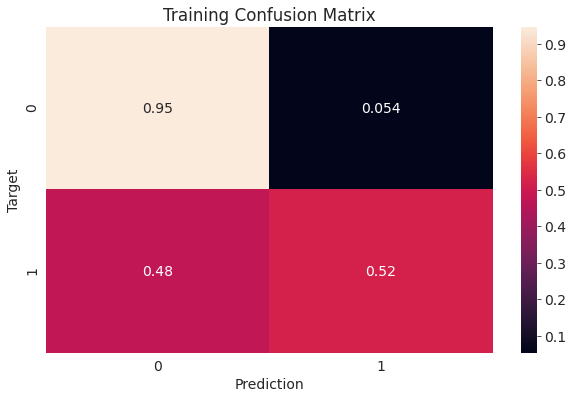

In [119]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy:85.40%


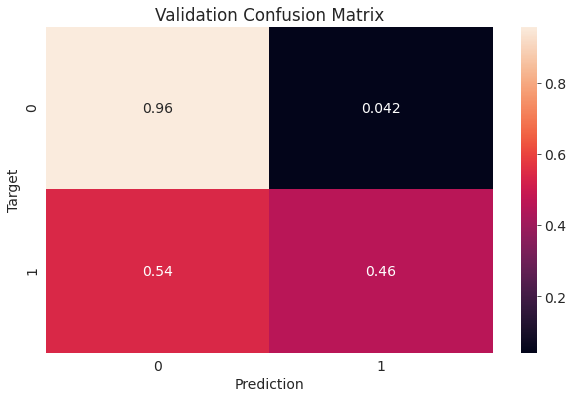

In [120]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy:84.91%


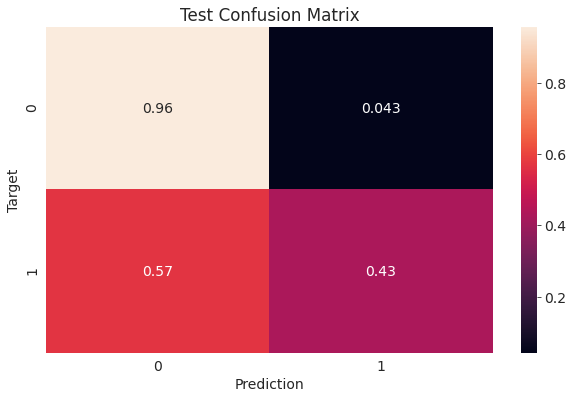

In [121]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [122]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [123]:
new_input_df = pd.DataFrame([new_input])

In [124]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [125]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  ...  WindDir3pm_WSW  RainToday_No  RainToday_Yes
0  0.747642  0.718336  0.027493  ...             0.0           0.0            1.0

[1 rows x 118 columns]

In [126]:
prediction = model.predict(X_new_input)[0]

In [127]:
prediction

'Yes'

In [128]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.48102629, 0.51897371])

In [129]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [130]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [131]:
predict_input(new_input)

('Yes', 0.6474962052641612)

In [132]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Saving and Loading training Models

In [133]:
import joblib

In [135]:
aussie_rain = {
    'model': model,
    'imputer' : imputer,
    'scaler': scaler,
    'encoder':encoder,
    'input_cols':input_cols,
    'target_cols': target_col,
    'numeric_cols':numeric_cols,
    'categorical_cols':categorical_cols,
    'encode_cols':encoded_cols
}

In [136]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [137]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [138]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8490859122953758